# Logistic Regression
Perform logistic regression on the data with GridSearch Cross Validation to get the best parameters for maximum accuracy

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [120]:
df = pd.read_csv('train.csv')

# def getTotalWords(row, gender='F'):
#     if gender == 'F':
#         if row['Lead'] == 'F':
#             return row['Number of words lead'] + row['Number words female']
#         else:
#             return (row['Number of words lead'] - row['Difference in words lead and co-lead']) + row['Number words female']
            
#     elif gender == 'M':
#         if row['Lead'] == 'M':
#             return row['Number of words lead'] + row['Number words male']
#         else:
#             return (row['Number of words lead'] - row['Difference in words lead and co-lead']) + row['Number words male']


# df['Total male words'] = df.apply(lambda row: getTotalWords(row, gender='M'), axis=1)
# df['Total female words'] = df.apply(lambda row: getTotalWords(row, gender='F'), axis=1)
# df.head()



0    1
1    0
2    0
3    0
4    0
Name: Lead, dtype: object

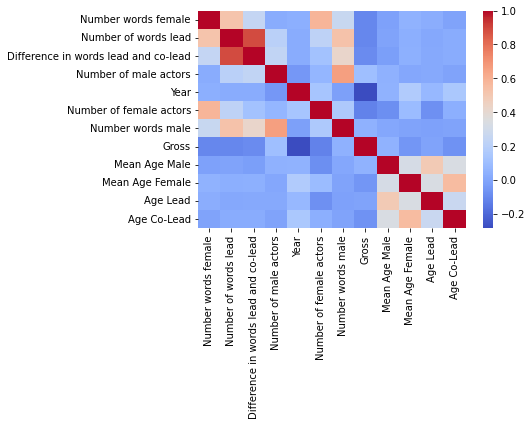

In [121]:
df['Lead'] = df['Lead'].map({'Female': '1', 'Male': '0'})

X = df.drop(['Total words', 'Lead'], axis=1)
y = df['Lead']
sns.heatmap(X.corr(), cmap='coolwarm')

y.head()

In [46]:
## Create pipleine 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=57)


In [94]:
scaler = StandardScaler()
lr = LogisticRegression()

operations = [('scaler', scaler), ('lr', lr)]
pipeline = Pipeline(steps=operations)

In [95]:
from sklearn.model_selection import GridSearchCV
c = [2.0, 1.0, 0.5, 0.25, 0.0625]
fit_intercept = [True, False]

param_grid = {"lr__C": c, "lr__fit_intercept": fit_intercept}
cv_classifier = GridSearchCV(pipeline, param_grid, scoring='accuracy', cv=10)



In [96]:
cv_classifier.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('lr', LogisticRegression())]),
             param_grid={'lr__C': [2.0, 1.0, 0.5, 0.25, 0.0625],
                         'lr__fit_intercept': [True, False]},
             scoring='accuracy')

In [97]:
cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()), ('lr', LogisticRegression(C=2.0))],
 'verbose': False,
 'scaler': StandardScaler(),
 'lr': LogisticRegression(C=2.0),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'lr__C': 2.0,
 'lr__class_weight': None,
 'lr__dual': False,
 'lr__fit_intercept': True,
 'lr__intercept_scaling': 1,
 'lr__l1_ratio': None,
 'lr__max_iter': 100,
 'lr__multi_class': 'auto',
 'lr__n_jobs': None,
 'lr__penalty': 'l2',
 'lr__random_state': None,
 'lr__solver': 'lbfgs',
 'lr__tol': 0.0001,
 'lr__verbose': 0,
 'lr__warm_start': False}

In [98]:
y_pred = cv_classifier.predict(X_test)

In [99]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
print(f"Accuracy: {np.mean(y_pred == y_test):.3f}")

              precision    recall  f1-score   support

           0       0.90      0.96      0.93        83
           1       0.80      0.57      0.67        21

    accuracy                           0.88       104
   macro avg       0.85      0.77      0.80       104
weighted avg       0.88      0.88      0.88       104

Accuracy: 0.885


# Tree based models (Random forest)
Experimenting with a tree based model to check for the best accuracy 

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=57)

In [101]:
from sklearn.ensemble import RandomForestClassifier

In [102]:
rf = RandomForestClassifier()

operations = [('scaler', scaler), ('rf', rf)]
pipeline = Pipeline(steps=operations)

In [103]:
criterion = ["gini", "entropy"]
min_samples_split = [2, 3, 4, 5, 7, 9]
max_features = ["sqrt", "log2"]

param_grid = {"rf__criterion": criterion, 
              "rf__min_samples_split": min_samples_split,
              "rf__max_features": max_features}

In [104]:
rf_cv_classifier = GridSearchCV(pipeline, param_grid, 
                                scoring='accuracy', cv=10)

In [59]:
accuracies

NameError: name 'accuracies' is not defined

In [109]:
rf_cv_classifier.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('rf', RandomForestClassifier())]),
             param_grid={'rf__criterion': ['gini', 'entropy'],
                         'rf__max_features': ['sqrt', 'log2'],
                         'rf__min_samples_split': [2, 3, 4, 5, 7, 9]},
             scoring='accuracy')

In [110]:
rf_cv_classifier.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('rf',
                 RandomForestClassifier(criterion='entropy',
                                        max_features='sqrt',
                                        min_samples_split=3))])

In [111]:
y_pred = rf_cv_classifier.predict(X_test)

In [112]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92        83
           1       0.79      0.52      0.63        21

    accuracy                           0.88       104
   macro avg       0.84      0.74      0.78       104
weighted avg       0.87      0.88      0.87       104



In [113]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.89      0.96      0.92        83
           1       0.79      0.52      0.63        21

    accuracy                           0.88       104
   macro avg       0.84      0.74      0.78       104
weighted avg       0.87      0.88      0.87       104



In [114]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.875

In [115]:
from sklearn.model_selection import cross_validate

model = RandomForestClassifier(criterion='entropy',
                                        max_features='log2',
                                        min_samples_split=5)

scores = cross_validate(model, X_train,y_train,
                         scoring=['accuracy'],cv=5)
scores = pd.DataFrame(scores)
scores.mean()

fit_time         0.101674
score_time       0.004251
test_accuracy    0.847059
dtype: float64

In [144]:
y_actual_pred = rf_cv_classifier.predict(X_actual_test)

In [145]:
y_df = pd.DataFrame(y_actual_pred)
y_df.T.to_csv('predictions-rf.csv', header=False, index=False)

# Multi-layer perceptron

In [25]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV


In [122]:
#df['Lead'] = df['Lead'].map({'Female': '1', 'Male': '0'})
# X = df.drop(['Total words', 'Lead'], axis=1)
# y = df['Lead']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=52)
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
len(X_train[0])

y.head()

0    1
1    0
2    0
3    0
4    0
Name: Lead, dtype: object

In [123]:
clf = MLPClassifier(solver='sgd', alpha=1e-5, 
                    hidden_layer_sizes=(len(X_train[0]), len(X_train[0])+2, len(X_train[0])+2), 
                    random_state=1,
                    max_iter=15000,
                    activation='tanh'
                   )

In [124]:
clf.fit(X_train, y_train)

MLPClassifier(activation='tanh', alpha=1e-05, hidden_layer_sizes=(12, 14, 14),
              max_iter=15000, random_state=1, solver='sgd')

In [125]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       249
           1       0.82      0.71      0.76        63

    accuracy                           0.91       312
   macro avg       0.87      0.84      0.85       312
weighted avg       0.91      0.91      0.91       312



In [126]:
# Apply cross validation
from sklearn.model_selection import cross_validate
scores = cross_validate(clf,X_train,y_train,
                         scoring=['accuracy'],cv=5)
accuracy_score(y_test, y_pred)

0.9102564102564102

In [127]:
scores = pd.DataFrame(scores)
scores.mean()

fit_time         0.808487
score_time       0.000411
test_accuracy    0.894020
dtype: float64

In [128]:
hidden_layer_sizes = [[len(X_train[0]), len(X_train[0]), len(X_train[0])], [len(X_train[0]), len(X_train[0])-5, len(X_train[0])+5]]
activation_funcs = ["identity", "logistic", "tanh", "relu"]
solver = ["sgd"]
alpha = [1e-05]
max_iter = [15000]

scaler_nn = StandardScaler()
mlp = MLPClassifier()

operations = [('scaler', scaler_nn), ('mlp', mlp)]
pipeline_nn = Pipeline(steps=operations)

param_grid = {"mlp__hidden_layer_sizes": hidden_layer_sizes, 
              "mlp__activation": activation_funcs, 
              "mlp__solver":solver,
              "mlp__alpha":alpha,
              "mlp__max_iter": max_iter
             }
cv_mlp_classifier = GridSearchCV(pipeline_nn, param_grid, scoring='accuracy', cv=12)


In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=52)
cv_mlp_classifier.fit(X_train, y_train)

GridSearchCV(cv=12,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('mlp', MLPClassifier())]),
             param_grid={'mlp__activation': ['identity', 'logistic', 'tanh',
                                             'relu'],
                         'mlp__alpha': [1e-05],
                         'mlp__hidden_layer_sizes': [[12, 12, 12], [12, 7, 17]],
                         'mlp__max_iter': [15000], 'mlp__solver': ['sgd']},
             scoring='accuracy')

In [131]:
cv_mlp_classifier.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('mlp',
                 MLPClassifier(activation='tanh', alpha=1e-05,
                               hidden_layer_sizes=[12, 7, 17], max_iter=15000,
                               solver='sgd'))])

In [132]:
test_df = pd.read_csv('test.csv')

In [133]:
X_actual_test = test_df.drop(['Total words'], axis=1)

In [146]:
y_actual_pred = cv_mlp_classifier.predict(X_actual_test)

In [147]:
y_df = pd.DataFrame(y_actual_pred)

In [ ]:
y_df.T.to_csv('predictions.csv', header=False, index=False)

In [41]:
y_df.to_csv("predictions.csv")

usage: ipykernel_launcher.py [-h] [--file FILE]
ipykernel_launcher.py: error: unrecognized arguments: -f /Users/derrickadjei/Library/Jupyter/runtime/kernel-8b91711e-1f23-44b4-b226-3a97b6279d5e.json


SystemExit: 2

/Users/derrickadjei/opt/anaconda3/envs/ml/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3405: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
